# MALIGNANT MELANOMA PATIENTS - EXPLORATORY DATA ANALYSIS
    By: Elsie Kafui Funkor

### Problem Statement ###

The data consists of measurements made on patients with malignant melanoma. Each patient
had their tumour removed by surgery at the Department of Plastic Surgery, University Hospital
of Odense, Denmark during the period 1962 to 1977. The surgery consisted of complete
removal of the tumour together with about 2.5cm of the surrounding skin.
Among the measurements taken were the thickness of the tumour and whether it was
ulcerated or not. These are thought to be important prognostic variables in that patients with a
thick and/or ulcerated tumour have an increased chance of death from melanoma. Patients
were followed until the end of 1977. The data frame contains the following columns.

• time - Survival time in days since the operation.

• status - The patients status at the end of the study

1 indicates that they had died from melanoma, 2 indicates that they were still alive and 3
indicates that they had died from causes unrelated to their melanoma.

• sex - The patients sex; 1=male, 0=female.

• age - Age in years at the time of the operation.

• year - Year of operation.

• thickness - Tumour thickness in mm.

• ulcer - Indicator of ulceration; 1=present, 0=absent

## Objectives

1. Data Exploration and Cleaning:
Ensure the dataset is clean and free of inconsistencies.
Provide descriptive statistics for all variables to understand their distributions and identify any anomalies.

2. Survival Analysis:
Perform survival analysis to estimate survival functions and compare survival rates among different groups.
Assess the impact of tumour thickness and ulceration on survival time.

3. Statistical Modeling:
Develop Cox proportional hazards models to evaluate the influence of prognostic variables on survival time.
Identify which factors (e.g., tumour thickness, ulceration, age, sex) are significant predictors of mortality.

4. Visualization:
Create visualizations (e.g., Kaplan-Meier curves, hazard plots) to illustrate survival probabilities and the effect of different variables on survival.

5. Visual tools and dashboards to aid clinicians in understanding the survival prospects of melanoma patients.

## Business Questions
1. Identify the data distribution of male and females?(ratio of males to females)
2. Variation on rate of death caused by melanoma with patients with ulcerated tumour.
3. How does age affect thickness of the tumour?
4. Distribution of tumor thickness among the patients?
5. Total number of ulcerated tumors patients had.
6. Find the average and median tumor thickness for patients with ulcerated and non-ulcerated tumors?
7. Identify relationship between tumor thickness and ulceration.
8. Survival rate among patients based on tumor thickness and ulceration status.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.5 MB/s eta 0:00:00


In [4]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pingouin

In [125]:
#Loading the dataset int the 'df' dataFrame
df = pd.read_csv('/content/drive/MyDrive/Bloossom/Data Science/melanoma.csv')

In [126]:
#Data Overview
df.head()

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


In [127]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       205 non-null    int64  
 1   status     205 non-null    int64  
 2   sex        205 non-null    int64  
 3   age        205 non-null    int64  
 4   year       205 non-null    int64  
 5   thickness  205 non-null    float64
 6   ulcer      205 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.3 KB


### Modify the time column

In [128]:
#Rename the time column and specify that it is a column(axis = 1)
df.rename({'time' : 'time(day)'}, inplace = True, axis=1)

In [129]:
#Rename the thickness column and specify that it is a column(axis = 1)
df.rename({'thickness' : 'thickness(mm)'}, inplace = True, axis=1)

In [130]:
#Checking for Updated dataFrame
df.head()

,time(day),status,sex,age,year,thickness(mm),ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


### Modify the 'Status' column as a categorical data

      *   1 - Dead(melanoma)
      *   2 - Alive
      *   3 - Dead(other)


In [131]:
df['status'].replace({1:'Dead(melanoma)',2:'Alive', 3:'Dead(other)'}, inplace = True)

In [132]:
#Checking the data type
df['status'].dtype

dtype('O')

In [133]:
#Changing the data type to categorical data type
df['status'] = df['status'].astype('category')

### Modify the 'Sex' column as a categorical data

In [134]:
df.rename({'sex': 'sex (M/F)'}, inplace = True, axis = 1)

In [135]:
df['sex (M/F)'].replace({1:'M',0:'F'}, inplace=True)

In [136]:
df.head()

,time(day),status,sex (M/F),age,year,thickness(mm),ulcer
0,10,Dead(other),M,76,1972,6.76,1
1,30,Dead(other),M,56,1968,0.65,0
2,35,Alive,M,41,1977,1.34,0
3,99,Dead(other),F,71,1968,2.90,0
4,185,Dead(melanoma),M,52,1965,12.08,1


In [137]:
#Checking the data type
df['sex (M/F)'].dtype

dtype('O')

In [138]:
#Changing the data type to categorical data type
df['sex (M/F)'] = df['sex (M/F)'].astype('category')

In [139]:
#Confirming the data type
df['sex (M/F)'].dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

### Modify 'year' column asa categorical data type

In [140]:
#Changing the data type to categorical data type
df['year'] = df['year'].astype('int')

In [141]:
#Confirming the data type
df['year'].dtype

dtype('int64')

### Modify 'ulcer' column as a categorical data

In [142]:
df['ulcer'].replace({1:'present', 0:'absent'}, inplace = True)

In [143]:
#Checking the data type
df['ulcer'].dtype

dtype('O')

In [144]:
#Changing the data type to categorical data type
df['ulcer'] = df['ulcer'].astype('category')

In [145]:
#Confirming the data type
df['ulcer'].dtype

CategoricalDtype(categories=['absent', 'present'], ordered=False)

### Data Information

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   time(day)      205 non-null    int64   
 1   status         205 non-null    category
 2   sex (M/F)      205 non-null    category
 3   age            205 non-null    int64   
 4   year           205 non-null    int64   
 5   thickness(mm)  205 non-null    float64 
 6   ulcer          205 non-null    category
dtypes: category(3), float64(1), int64(3)
memory usage: 7.5 KB


In [147]:
df.head()

,time(day),status,sex (M/F),age,year,thickness(mm),ulcer
0,10,Dead(other),M,76,1972,6.76,present
1,30,Dead(other),M,56,1968,0.65,absent
2,35,Alive,M,41,1977,1.34,absent
3,99,Dead(other),F,71,1968,2.90,absent
4,185,Dead(melanoma),M,52,1965,12.08,present


### Summary Statistics

In [148]:
#display the statistics of the data
df.describe()

,time(day),age,year,thickness(mm)
count,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,52.463415,1969.907317,2.919854
std,1122.060667,16.671711,2.575563,2.959433
min,10.000000,4.000000,1962.000000,0.100000
25%,1525.000000,42.000000,1968.000000,0.970000
50%,2005.000000,54.000000,1970.000000,1.940000
75%,3042.000000,65.000000,1972.000000,3.560000
max,5565.000000,95.000000,1977.000000,17.420000


**From the summary statistics,**

*   *The average ade of the patients is 52.463... which is not reflected properly*
*  *the minimum age is 4*
*  *The maximum age is 95*
*  *The median age is 52*  
*  *The average thickness in mm is 2.91...*
*  *The year with the most frequency is '1972' as the 75th percentile*
*  *The median of the years is '1972' as the 50th percentile*
*  *The year with the least frequency is '1968' as the 25th percentile*






### Total  number of patients treated within 1962 -1977

In [149]:
total_num_patients = len(df)
total_num_patients

205

*About 205 patients were treated between 1962 - 1977.*

### Check for duplicates

In [150]:
#Check for duplicates
df.duplicated().sum()

0

*There are no duplicates*

#Check for each year, the no. of patients and their status, thickness of tumour, and the condition of ulcereration.

### **Unique Values**
**unique values for age, thickness, and year.**

***age***

In [151]:
df['age'].nunique()

70

In [152]:
#Unique values for age
df['age'].unique()

array([76, 56, 41, 71, 52, 28, 77, 60, 49, 68, 53, 64, 63, 14, 72, 46, 95,
       54, 89, 25, 37, 43, 67, 86, 16, 42, 65, 58, 75, 19, 66, 74, 27, 73,
       69, 80, 61, 26, 57, 45, 31, 36, 55, 20, 44, 59, 32, 83, 15, 47, 38,
       48, 70, 40, 35, 34, 84, 39, 33, 62, 51, 50, 24, 78, 29,  4, 12, 21,
       30, 22])

In [153]:
#No. of age inputs
df['age'].unique().sum()

3465

***thickness***

In [154]:
#Unique values for thickness
df['thickness(mm)'].unique()

array([ 6.76,  0.65,  1.34,  2.9 , 12.08,  4.84,  5.16,  3.22, 12.88,
        7.41,  4.19,  0.16,  3.87,  2.42, 12.56,  5.8 ,  7.06,  5.48,
        7.73, 13.85,  2.34,  4.04,  0.32,  8.54,  2.58,  3.56,  3.54,
        0.97,  4.83,  1.62,  6.44, 14.66,  2.24, 17.42,  1.29,  4.51,
        8.38,  1.94,  2.1 ,  0.81,  1.13,  1.37,  0.24,  0.48,  2.26,
        0.58,  1.78,  1.53,  3.06,  4.09,  0.64,  1.76,  5.64,  9.66,
        0.1 ,  1.45,  4.82,  7.89,  7.09,  6.12,  2.74,  1.03, 12.24,
        8.06])

In [155]:
#No. of thickness inputs
df['thickness(mm)'].nunique()

64

*Certain thickness of the tumours could be common among the patients*

#Unique years

In [156]:
#Unique values for thickness
a = df['year'].unique().tolist()#convert the array to a list
years_df  = []
years_df .append( a)
#years_df =[str(x) for x in years_df ]
years_df

[[1972,
  1968,
  1977,
  1965,
  1971,
  1974,
  1969,
  1970,
  1967,
  1973,
  1966,
  1964,
  1962]]

In [157]:
type(years_df)

list

In [158]:
#Unique values for thickness
df['year'].nunique()

13

In [159]:
# Initialize an empty list
years_list  = []

# Iterate over years from 1962-1977
for i in range(1962,1978):
  years= i
  # Append the years to the list
  years_list.append(years)

print(years_list)

[1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977]


1963, 1975, and 1976 were years without anyfollow up data.

In [160]:
#duplicated
year_duplicated= df[df['year'].duplicated()]
year_duplicated

,time(day),status,sex (M/F),age,year,thickness(mm),ulcer
3,99,Dead(other),F,71,1968,2.90,absent
6,210,Dead(melanoma),M,77,1972,5.16,present
8,232,Dead(melanoma),M,49,1968,12.88,present
9,279,Dead(melanoma),F,68,1971,7.41,present
11,355,Dead(other),F,64,1972,0.16,present
...,...,...,...,...,...,...,...
198,4390,Alive,F,26,1965,1.94,present
199,4479,Alive,F,19,1965,1.13,present
200,4492,Alive,M,29,1965,7.06,present
201,4668,Alive,F,40,1965,6.12,absent


*

#### Missing values


In [161]:
df.isna()

,time(day),status,sex (M/F),age,year,thickness(mm),ulcer
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False


In [162]:
df.isna().sum()

time(day)        0
status           0
sex (M/F)        0
age              0
year             0
thickness(mm)    0
ulcer            0
dtype: int64

*There are no missing values*

# **Exploratory Data Analysis (EDA)**

# *Univariate Analysis*

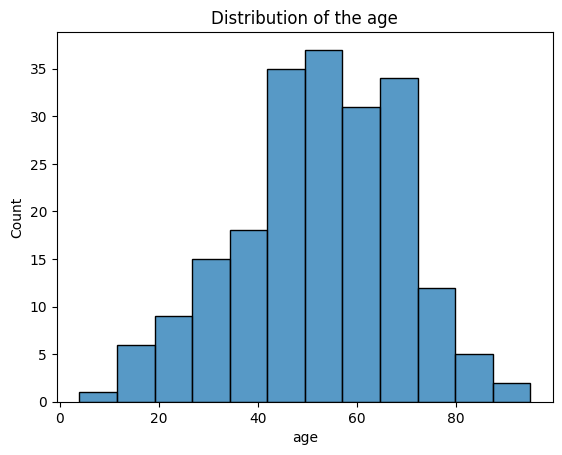

In [163]:
#Distribution of the age
# Histogram of age
sns.histplot(df['age'])
plt.title('Distribution of the age')
plt.show()

*The distribution of the age follows a normal distribution*

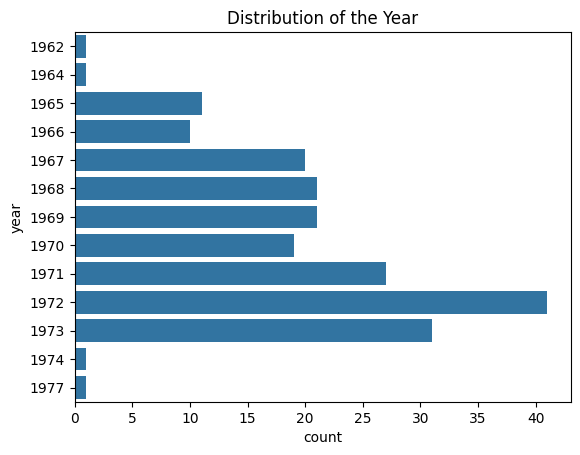

In [164]:
sns.countplot(y=df['year'])
plt.title('Distribution of the Year')
plt.show()

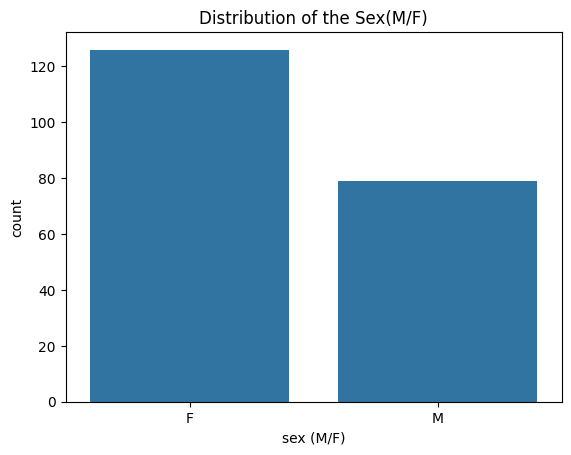

In [165]:
sns.countplot(x=df['sex (M/F)'])
plt.title('Distribution of the Sex(M/F)')
plt.show()

***There were more females than males***

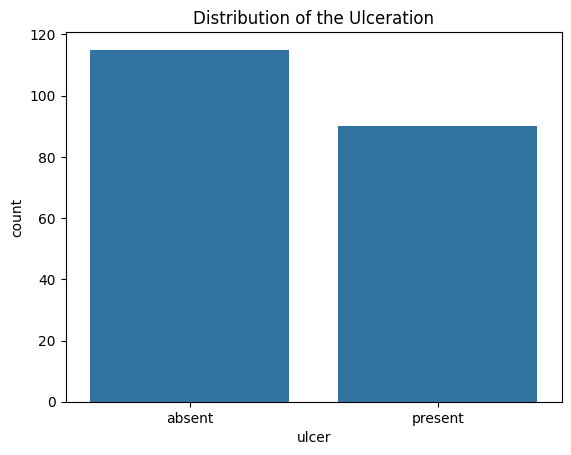

In [166]:
sns.countplot(x=df['ulcer'])
plt.title('Distribution of the Ulceration')
plt.show()

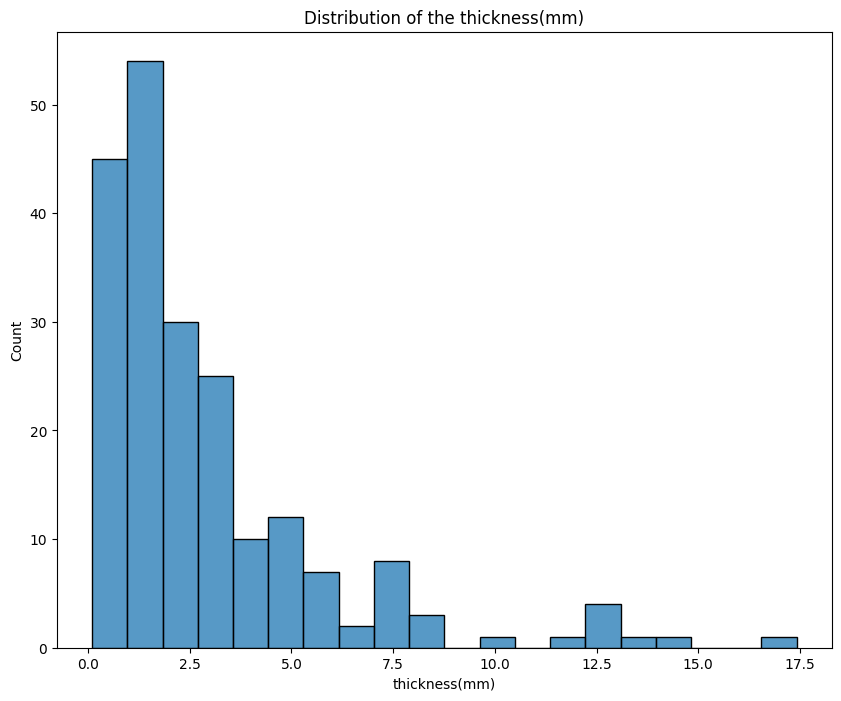

In [167]:
plt.figure(figsize=(10,8))
sns.histplot(x=df['thickness(mm)'])
plt.title('Distribution of the thickness(mm)')
plt.show()

In [168]:
df['thickness(mm)'].mode()

0    1.29
Name: thickness(mm), dtype: float64

*The most frequent thickness of the tumour was   1.29mm*

# ***Bivariate Analysis***

# **Ratio of the statuses**

In [169]:
df.head()

,time(day),status,sex (M/F),age,year,thickness(mm),ulcer
0,10,Dead(other),M,76,1972,6.76,present
1,30,Dead(other),M,56,1968,0.65,absent
2,35,Alive,M,41,1977,1.34,absent
3,99,Dead(other),F,71,1968,2.90,absent
4,185,Dead(melanoma),M,52,1965,12.08,present


In [170]:
melanoma_1 = df[df['status']=='Dead(melanoma)']
melanoma_1

,time(day),status,sex (M/F),age,year,thickness(mm),ulcer
4,185,Dead(melanoma),M,52,1965,12.08,present
5,204,Dead(melanoma),M,28,1971,4.84,present
6,210,Dead(melanoma),M,77,1972,5.16,present
8,232,Dead(melanoma),M,49,1968,12.88,present
9,279,Dead(melanoma),F,68,1971,7.41,present
10,295,Dead(melanoma),F,53,1969,4.19,present
12,386,Dead(melanoma),F,68,1965,3.87,present
13,426,Dead(melanoma),M,63,1970,4.84,present
14,469,Dead(melanoma),F,14,1969,2.42,present
16,529,Dead(melanoma),M,46,1971,5.80,present


In [171]:
melanoma_2 =df[df['status']=='Alive']
melanoma_2

,time(day),status,sex (M/F),age,year,thickness(mm),ulcer
2,35,Alive,M,41,1977,1.34,absent
45,1499,Alive,M,73,1973,1.29,absent
47,1508,Alive,M,63,1973,8.38,present
48,1510,Alive,F,69,1973,1.94,absent
49,1512,Alive,F,77,1973,0.16,absent
...,...,...,...,...,...,...,...
200,4492,Alive,M,29,1965,7.06,present
201,4668,Alive,F,40,1965,6.12,absent
202,4688,Alive,F,42,1965,0.48,absent
203,4926,Alive,F,50,1964,2.26,absent


In [172]:
melanoma_3 =df[df['status']=='Dead(other)']
melanoma_3

,time(day),status,sex (M/F),age,year,thickness(mm),ulcer
0,10,Dead(other),M,76,1972,6.76,present
1,30,Dead(other),M,56,1968,0.65,absent
3,99,Dead(other),F,71,1968,2.90,absent
7,232,Dead(other),F,60,1974,3.22,present
11,355,Dead(other),F,64,1972,0.16,present
15,493,Dead(other),M,72,1971,12.56,present
26,826,Dead(other),F,86,1965,8.54,present
43,1427,Dead(other),M,64,1972,1.29,absent
51,1525,Dead(other),F,76,1970,1.29,present
88,1860,Dead(other),M,71,1969,4.84,present


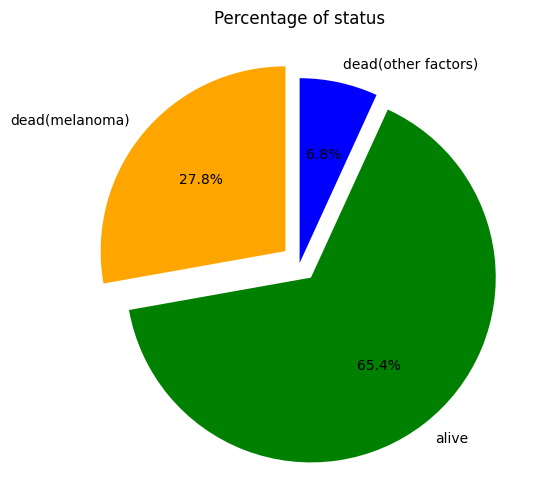

In [173]:
sizes = [melanoma_1['status'].shape[0] ,melanoma_2['status'].shape[0] ,melanoma_3['status'].shape[0]]
labels =['dead(melanoma)', 'alive', 'dead(other factors)']
colors =['orange', 'green', 'blue']

#explode the first  2 slice (melanoma_1,and melanoma_2)
explode_list = [0.1,0.1,0]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, explode = explode_list, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Percentage of status")
plt.show()

**Ulcerated Ratio**

In [174]:
ulcerated = df[df['ulcer']=='present']
ulcerated

,time(day),status,sex (M/F),age,year,thickness(mm),ulcer
0,10,Dead(other),M,76,1972,6.76,present
4,185,Dead(melanoma),M,52,1965,12.08,present
5,204,Dead(melanoma),M,28,1971,4.84,present
6,210,Dead(melanoma),M,77,1972,5.16,present
7,232,Dead(other),F,60,1974,3.22,present
...,...,...,...,...,...,...,...
190,3909,Alive,M,42,1967,8.06,present
195,4124,Alive,F,30,1966,1.94,present
198,4390,Alive,F,26,1965,1.94,present
199,4479,Alive,F,19,1965,1.13,present


In [175]:
not_ulcerated = df[df['ulcer']=='absent']
not_ulcerated

,time(day),status,sex (M/F),age,year,thickness(mm),ulcer
1,30,Dead(other),M,56,1968,0.65,absent
2,35,Alive,M,41,1977,1.34,absent
3,99,Dead(other),F,71,1968,2.90,absent
25,817,Dead(melanoma),F,67,1966,0.32,absent
28,858,Dead(melanoma),F,16,1967,3.56,absent
...,...,...,...,...,...,...,...
197,4310,Alive,M,55,1966,2.10,absent
201,4668,Alive,F,40,1965,6.12,absent
202,4688,Alive,F,42,1965,0.48,absent
203,4926,Alive,F,50,1964,2.26,absent


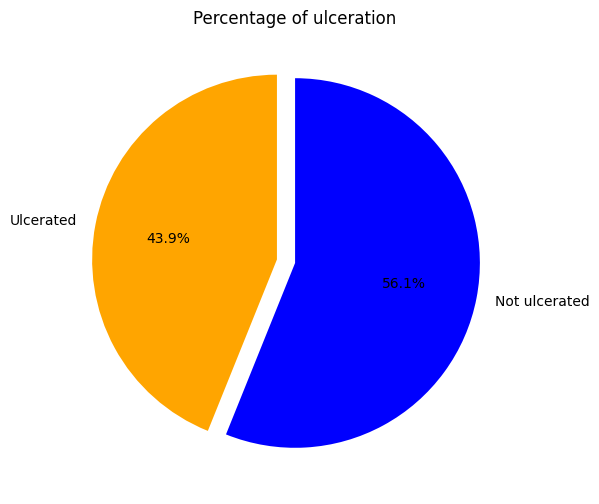

In [176]:
sizes = [ulcerated['ulcer'].shape[0] ,not_ulcerated['ulcer'].shape[0]]
labels =['Ulcerated', 'Not ulcerated']
colors =['orange', 'blue']
#explode the first  2 slice (melanoma_1,and melanoma_2)
explode_list = [0.1,0]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, explode = explode_list, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Percentage of ulceration")
plt.show()

In [177]:
ab = not_ulcerated[['status','ulcer']]
ab

,status,ulcer
1,Dead(other),absent
2,Alive,absent
3,Dead(other),absent
25,Dead(melanoma),absent
28,Dead(melanoma),absent
...,...,...
197,Alive,absent
201,Alive,absent
202,Alive,absent
203,Alive,absent


In [178]:
pr=ulcerated[['status','ulcer']]
pr

,status,ulcer
0,Dead(other),present
4,Dead(melanoma),present
5,Dead(melanoma),present
6,Dead(melanoma),present
7,Dead(other),present
...,...,...
190,Alive,present
195,Alive,present
198,Alive,present
199,Alive,present


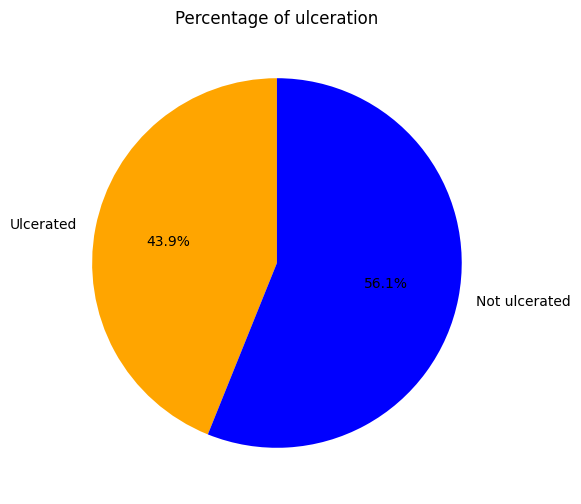

In [179]:
# Extracting status and ulcer from DataFrame
sizes = [pr['ulcer'].shape[0] ,ab['ulcer'].shape[0]]
labels =['Ulcerated', 'Not ulcerated']
colors =['orange', 'blue']
#explode the first  2 slice (melanoma_1,and melanoma_2)
# explode_list = [0.1,0]

plt.figure(figsize=(8, 6))
plt.pie(sizes , labels=labels,  autopct='%1.1f%%', colors=colors, startangle=90)
#plt.axis('equal')#ensure pie chart is a ircle
plt.title("Percentage of ulceration")
plt.show()

# **Sorting the status of the patients by the ulceration of the tumour**

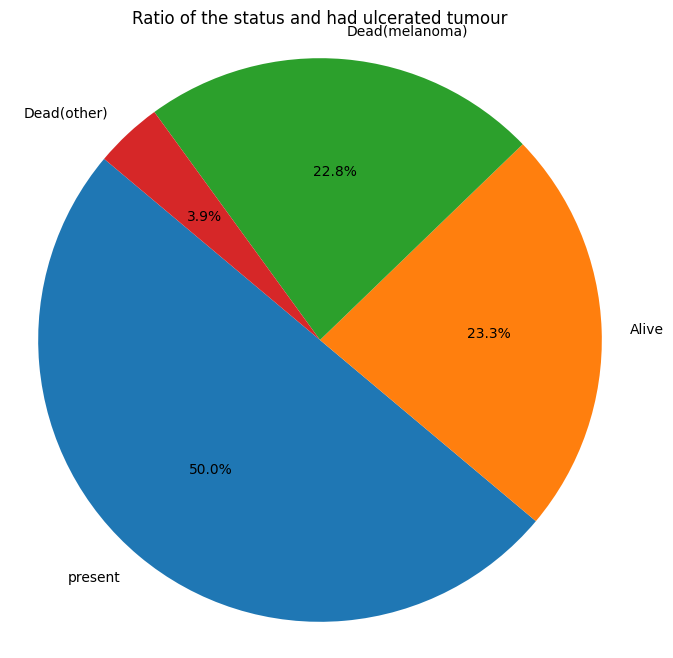

In [180]:
 # Concatenate the Series obtained from value_counts() for both columns
combined_counts = pd.concat([pr['ulcer'] ,pr['status']]).value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of the status and had ulcerated tumour')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

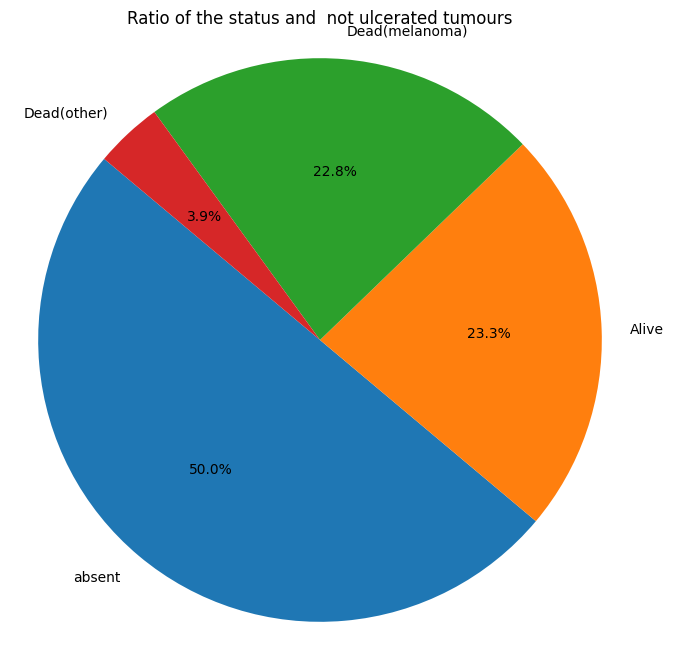

In [181]:
 # Concatenate the Series obtained from value_counts() for both columns
combined_counts1 = pd.concat([ab['ulcer'] ,ab['status']]).value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined_counts, labels=combined_counts1.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of the status and  not ulcerated tumours')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**Visualization of the above out of the total number of patiens for each**

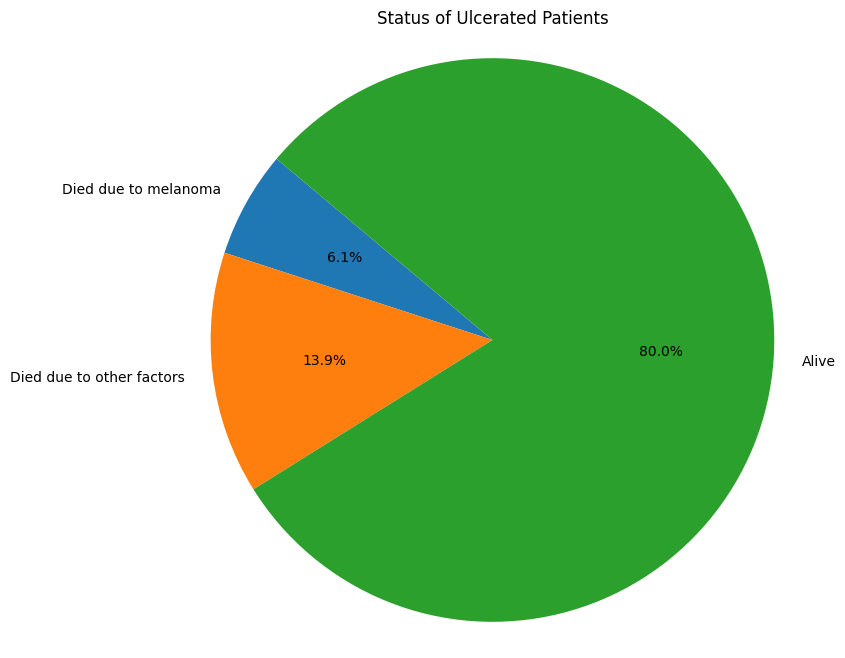

In [182]:
data = {
    'Died due to melanoma': 56.1 * 6.1 /100,
    'Died due to other factors': 56.1 * 13.9 / 100,
    'Alive': 56.1 * 80 / 100
}

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Status of Ulcerated Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

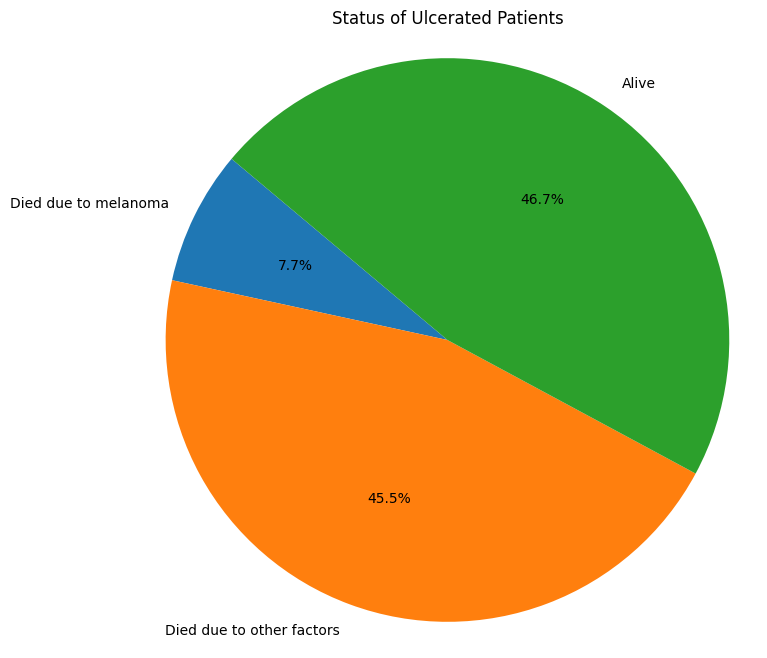

In [183]:
data = {
    'Died due to melanoma': 43.9 * 7.7 /100,
    'Died due to other factors': 43.9 * 45.5 / 100,
    'Alive': 43.9 * 46.7 / 100
}

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Status of Ulcerated Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# **Relationship between the columns**

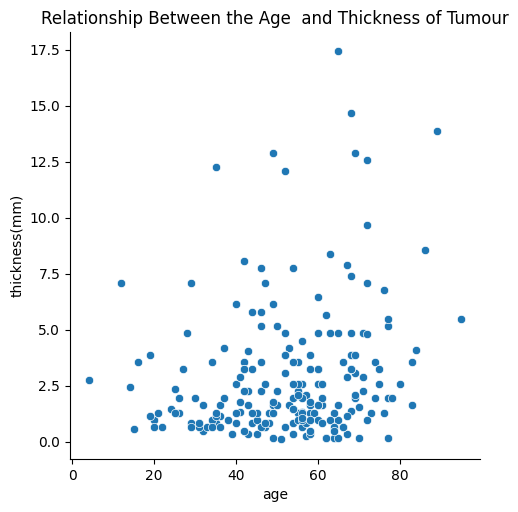

In [184]:
sns.relplot(y='thickness(mm)',x = 'age',data = df,
            kind = 'scatter',
           )
plt.title('Relationship Between the Age  and Thickness of Tumour')
plt.show()

*This confirms that the thickness of the tumour for the patients is clustered around 2 - 2.55mm*

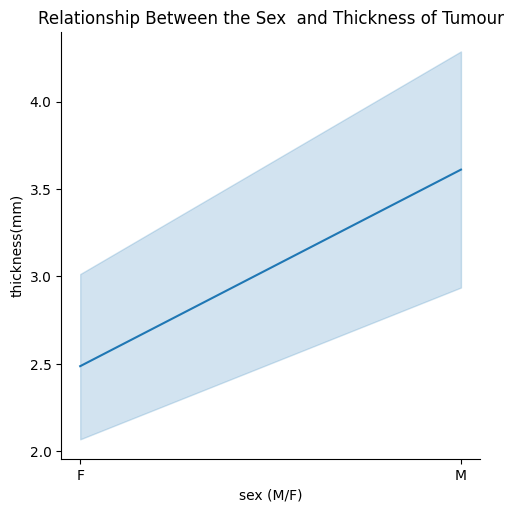

In [185]:
sns.relplot(y='thickness(mm)',x = 'sex (M/F)',data = df,
            kind = 'line',
           )
plt.title('Relationship Between the Sex  and Thickness of Tumour')
plt.show()

**The graph above shows that the thickness of the tumour varies with the sex of the patient.**

*In general,*
1.   *Females had lower thickness of tumour as compared to males*




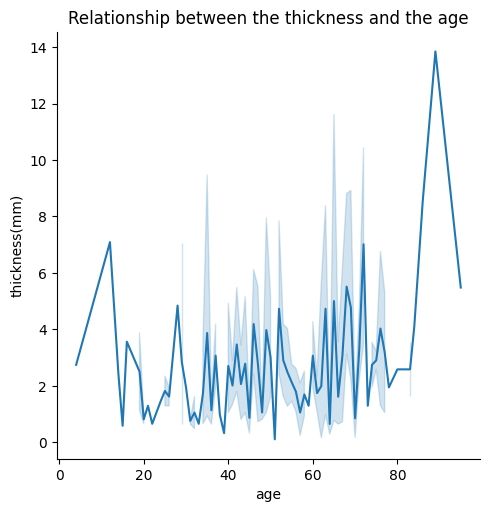

In [186]:
sns.relplot(y='thickness(mm)',x = 'age',data = df,
            kind = 'line'
           )
plt.title('Relationship between the thickness and the age')
plt.show()

*From the graph, the tumour thickness was low between say, 40 and  62 . Ages below and above this range may have been ulcerated , hence the higher the thickness of the tumour*

`kind`: 'pointplot'. Options are 'strip', 'swarm', 'box', 'boxen', 'violin', 'bar', 'count', and 'point'.

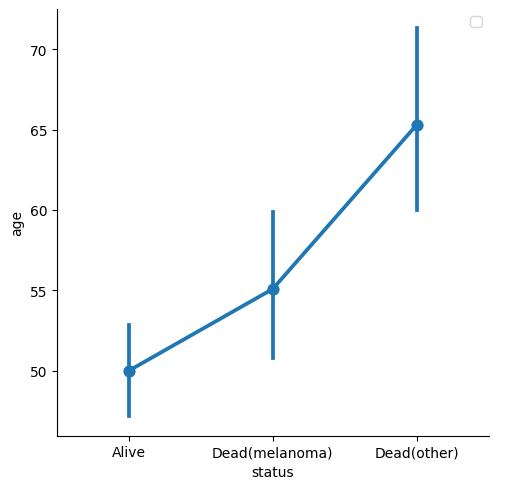

In [187]:
#plt.figure(figsize=(10,8))
# checking their age and how it affected their status
sns.catplot(x="status",y="age",data=df,kind='point')
plt.legend()
# Show plot
plt.show()

status
Alive             50.007463
Dead(melanoma)    55.087719
Dead(other)       65.285714
Name: age, dtype: float64


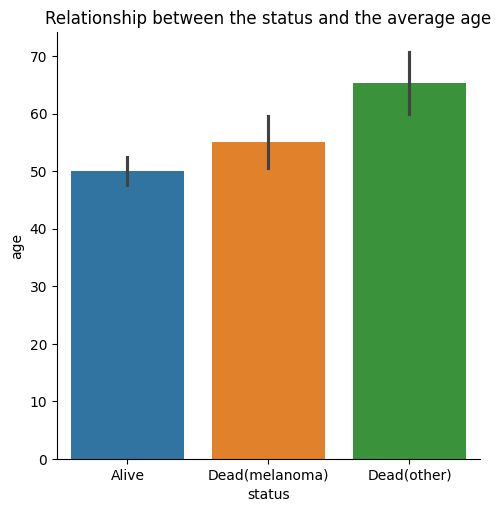

In [188]:
#plt.figure(figsize=(10,8))
# checking their age and how it affected their status
stats=df.groupby('status')['age'].mean()
sns.catplot(x="status",y="age", hue ='status', data=df,kind='bar')
plt.title('Relationship between the status and the average age')
print(stats)

*Those who died from other causes could have died due to age as a factor(ie.age could be one of the factors)*

In [189]:
df.describe()

,time(day),age,year,thickness(mm)
count,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,52.463415,1969.907317,2.919854
std,1122.060667,16.671711,2.575563,2.959433
min,10.000000,4.000000,1962.000000,0.100000
25%,1525.000000,42.000000,1968.000000,0.970000
50%,2005.000000,54.000000,1970.000000,1.940000
75%,3042.000000,65.000000,1972.000000,3.560000
max,5565.000000,95.000000,1977.000000,17.420000


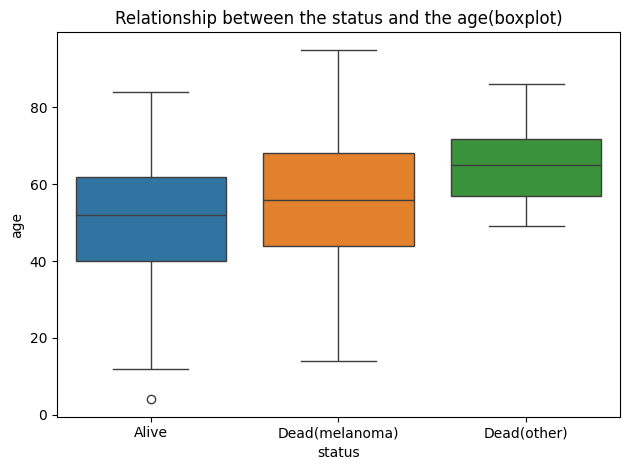

In [190]:
#plt.figure(figsize=(10,8))
# checking their age and how it affected their status
sns.boxplot(x="status",y="age", hue ='status', data=df)
plt.title('Relationship between the status and the age(boxplot)')
plt.tight_layout()

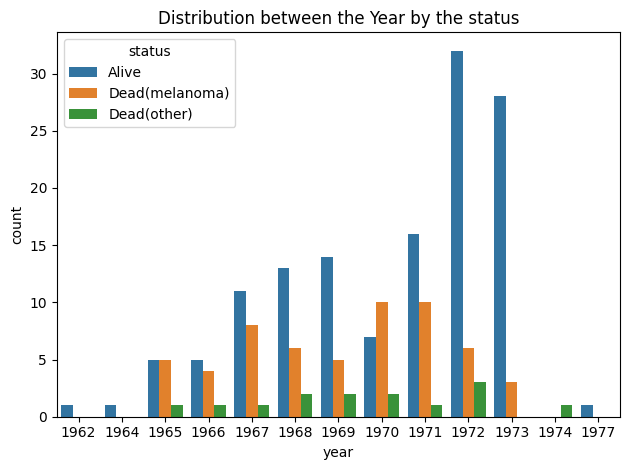

In [191]:

sns.countplot(data = df, x='year', hue = 'status')
plt.title('Distribution between the Year by the status')
plt.tight_layout()

Text(0.5, 1.0, 'Relationship between the sex of the patients and ulceration')

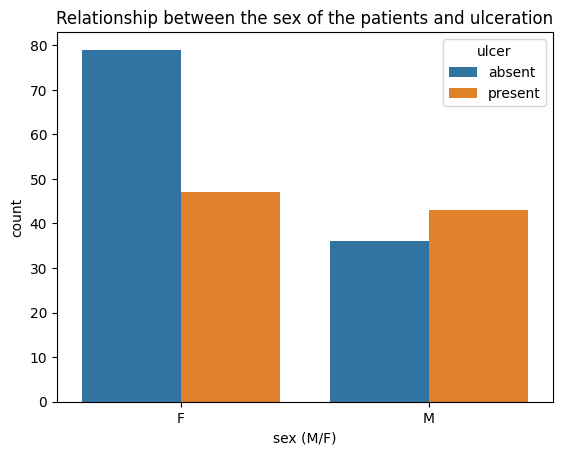

In [192]:
#Checking the count of ulcerated patient in terms of Females and males
sns.countplot(data=df, x='sex (M/F)', hue='ulcer')
plt.title('Relationship between the sex of the patients and ulceration')

*From the graph, more males had ulcerated melanoma as compared to the females*

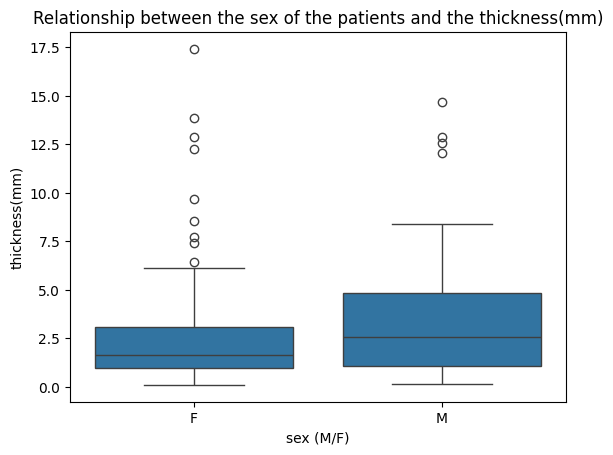

In [193]:
# Plotting boxplot for  categorical and numerical variable
sns.boxplot(x='sex (M/F)',y='thickness(mm)',data =df )
plt.title('Relationship between the sex of the patients and the thickness(mm)')
plt.show()

# **Thickness as a factor of death**

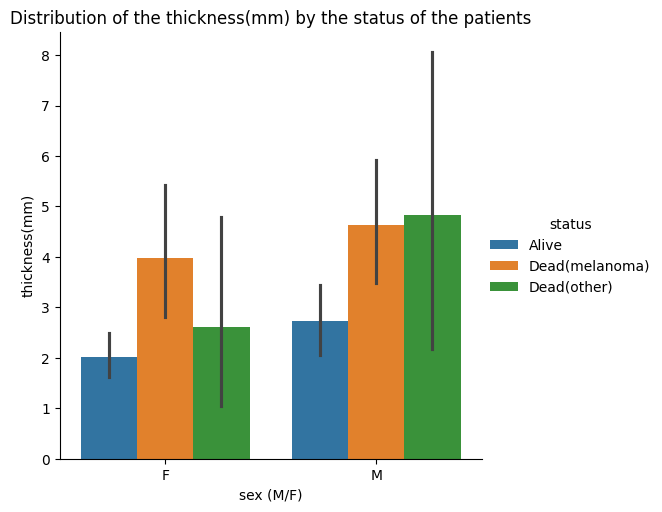

In [194]:
# Plotting boxplot for  categorical and numerical variable
sns.catplot(x='sex (M/F)',y='thickness(mm)', hue ='status',data =df, kind ='bar' )
plt.title('Distribution of the thickness(mm) by the status of the patients')
plt.show()

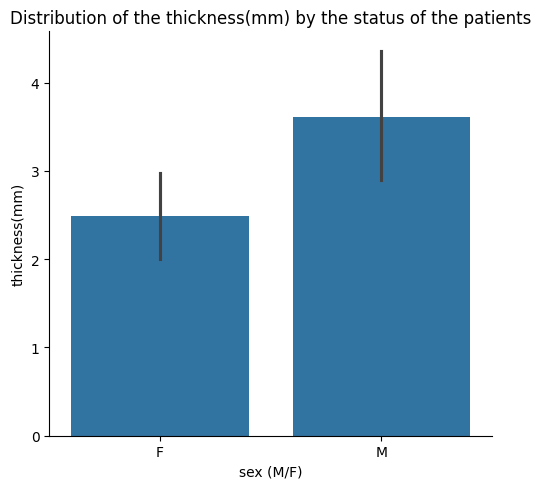

In [195]:
sns.catplot(x='sex (M/F)',y='thickness(mm)',data =df, kind ='bar' )
plt.title('Distribution of the thickness(mm) by the status of the patients')
plt.tight_layout()
plt.show()

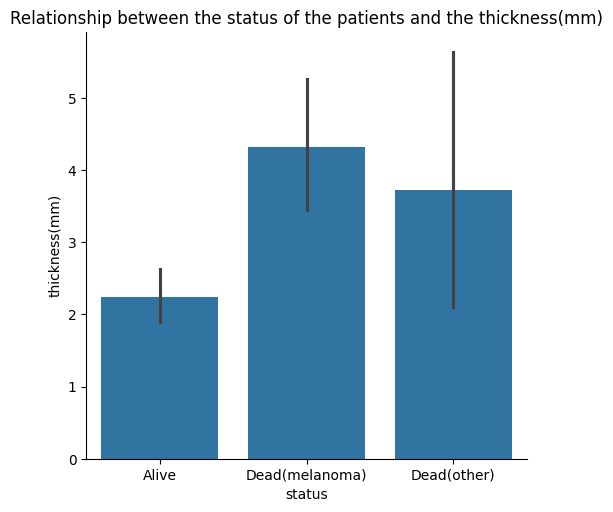

In [196]:
sns.catplot(x='status',y='thickness(mm)',data =df, kind ='bar' )
plt.title('Relationship between the status of the patients and the thickness(mm)')
plt.show()

*From the graphs above, the average thickness of tumour was greater in those who died from melanoma than those who survived*

# **Ulceration as a factor**

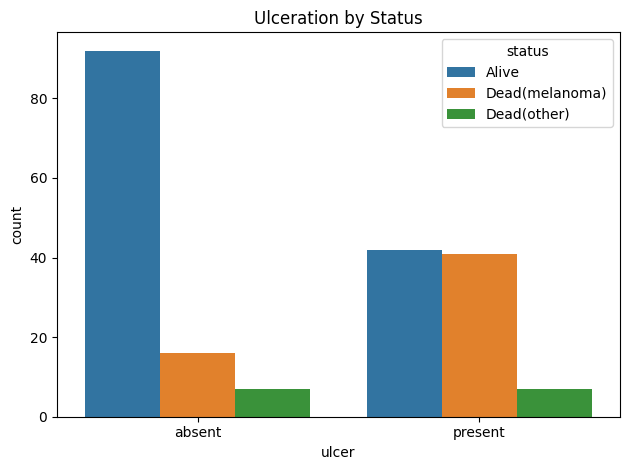

In [197]:
#Checking the count of ulcerated patient by the status
sns.countplot(data=df, x='ulcer', hue='status')
plt.title('Ulceration by Status')
plt.tight_layout()

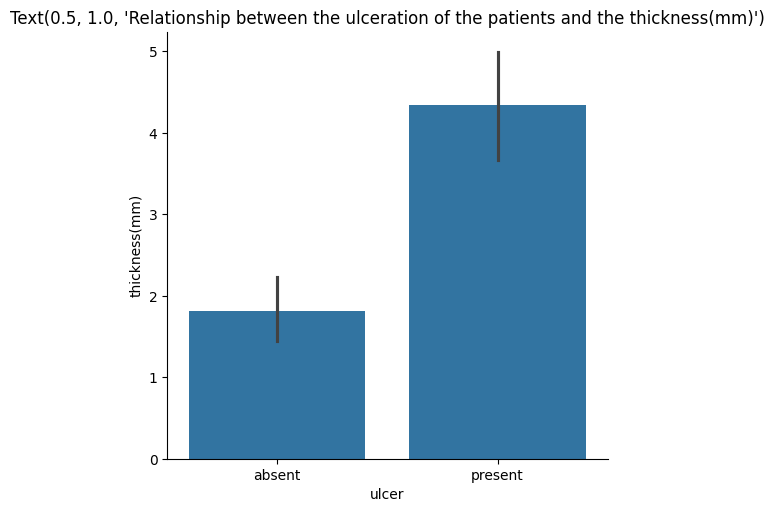

In [198]:
sns.catplot(x='ulcer',y='thickness(mm)',data =df, kind ='bar' )
plt.title(plt.title('Relationship between the ulceration of the patients and the thickness(mm)'))
plt.show()

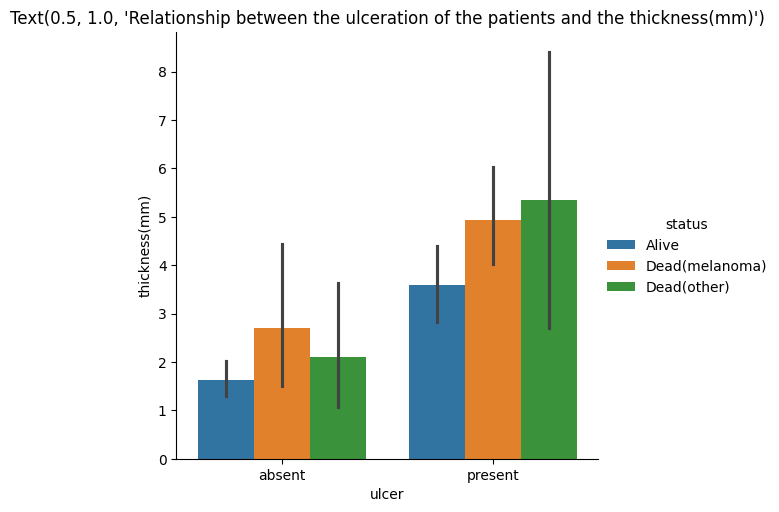

In [199]:
sns.catplot(x='ulcer',y='thickness(mm)', hue ='status',data =df, kind ='bar' )
plt.title(plt.title('Relationship between the ulceration of the patients and the thickness(mm)'))
plt.show()

*From the graphs above,the ulcerated tumours were generally thicker than in the cases were ulceration was absent*

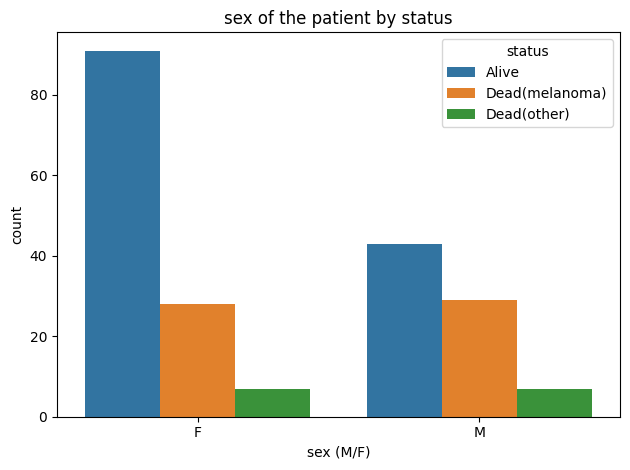

In [200]:
sns.countplot(data=df, x='sex (M/F)', hue='status')
plt.title('sex of the patient by status')
plt.tight_layout()

## Insights

 * From the graph, more females were alive as compared to the males*
 * Death due to other factors were less in general*
 * Death due to melanoma were almost the same for both males and females with the males dominating in number*

